In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_excel("Sales_Data_Record.xlsx")

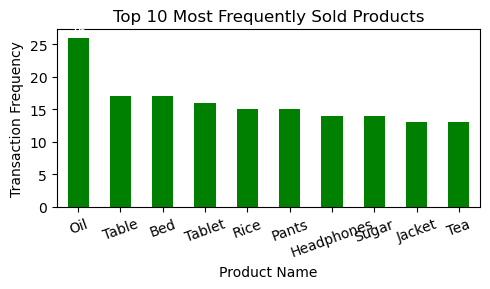

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Get the top 10 most frequently sold products
top_5_products = data['Sold Product Name'].value_counts().head(10)

# Create a bar plot for the top 10 most frequently sold products
plt.figure(figsize=(5, 3))
ax = top_5_products.plot(kind='bar', color='Green')
plt.style.use('dark_background')
plt.title('Top 10 Most Frequently Sold Products')
plt.xlabel('Product Name')
plt.ylabel('Transaction Frequency')
plt.xticks(rotation=20)

# Adding data labels to each bar
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()


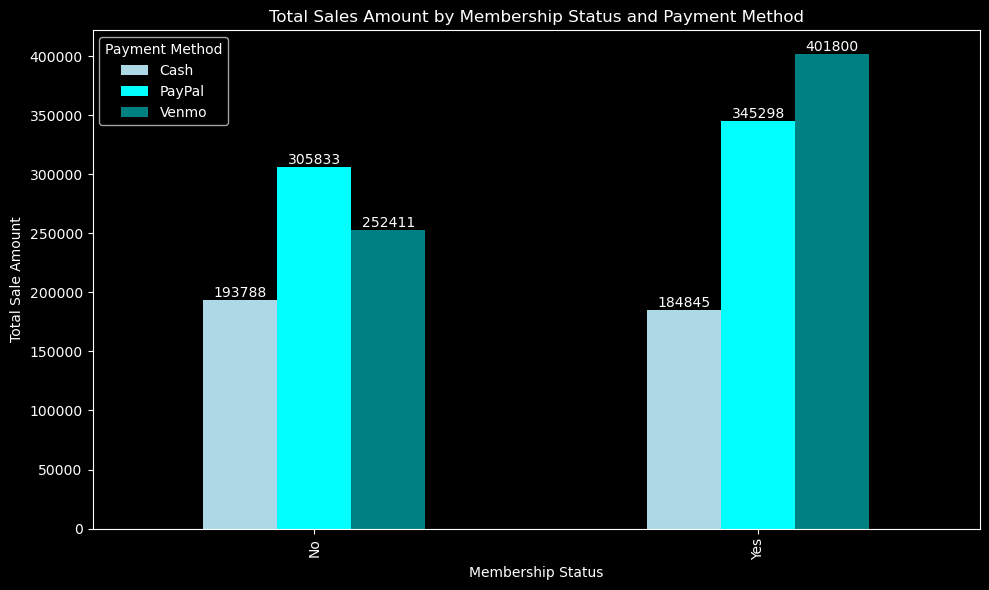

In [6]:
import matplotlib.pyplot as plt

# Group data by Membership status and Payment Method, then calculate the total sales amount
grouped_data = data.groupby(['Membership', 'Payment Method'])['Total Sale Amount'].sum().unstack()

# Plotting the bar chart with cool colors
grouped_data.plot(kind='bar', figsize=(10, 6), color=['lightblue', 'cyan', 'teal'])

# Adding title and labels
plt.title('Total Sales Amount by Membership Status and Payment Method')
plt.xlabel('Membership Status')
plt.ylabel('Total Sale Amount')

# Display the values on top of the bars
for container in plt.gca().containers:
    plt.bar_label(container)

plt.tight_layout()
plt.show()


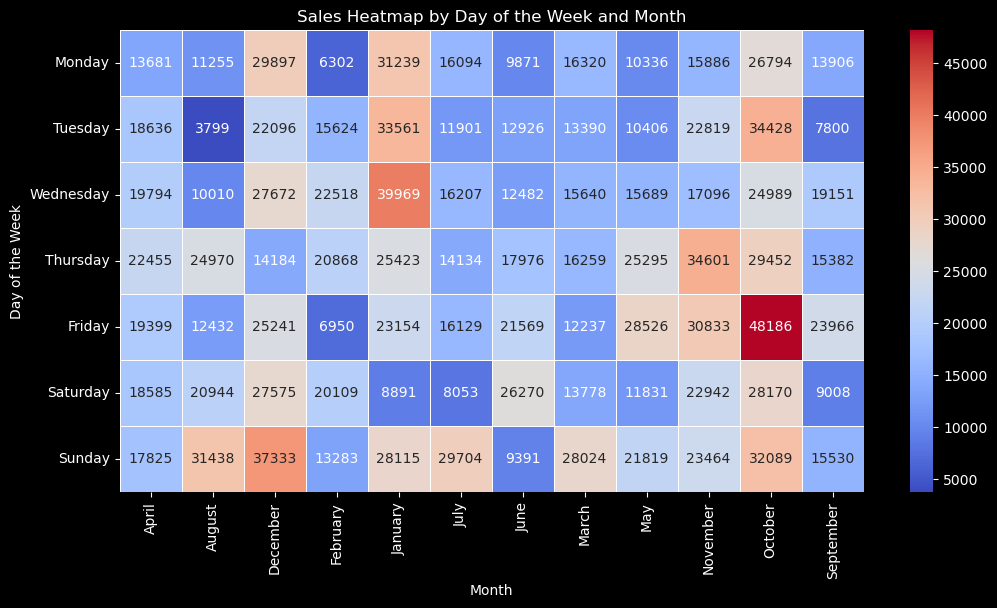

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the Date column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract day of the week and month name
data['Day of Week'] = data['Date'].dt.day_name()  # Day of the week (e.g., Monday, Tuesday)
data['Month'] = data['Date'].dt.month_name()  # Full month name (e.g., June)

# Pivot table: Sum of sales by day of the week and month
sales_pivot = data.pivot_table(index='Day of Week', columns='Month', values='Total Sale Amount', aggfunc='sum')

# Sort days of the week for better readability
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_pivot = sales_pivot.reindex(order)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(sales_pivot, cmap='coolwarm', annot=True, fmt=".0f", linewidths=0.5)
plt.title('Sales Heatmap by Day of the Week and Month')
plt.xlabel('Month')
plt.ylabel('Day of the Week')
plt.show()


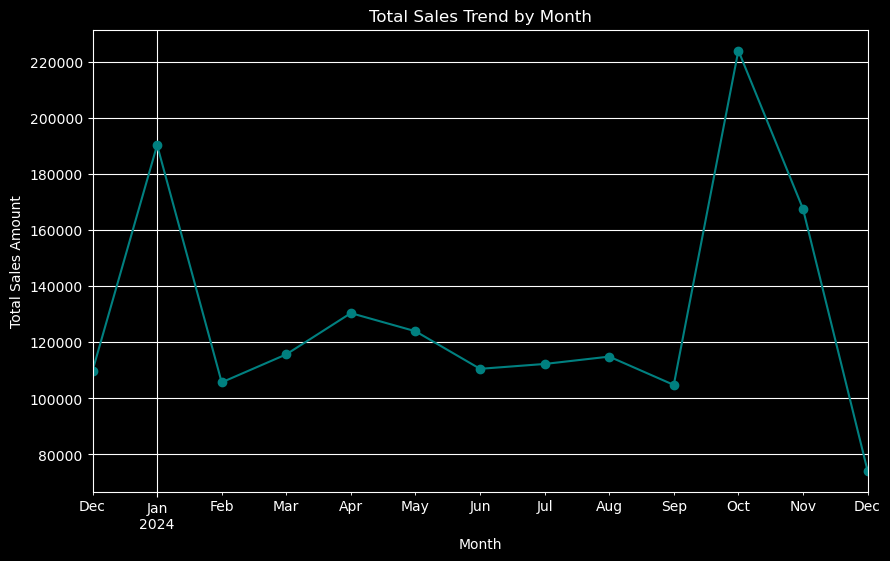

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure Date is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract year and month
data['Year-Month'] = data['Date'].dt.to_period('M')

# Group by Year-Month to calculate total sales
monthly_sales = data.groupby('Year-Month')['Total Sale Amount'].sum()

# Plot total sales for each month
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='teal')
plt.title('Total Sales Trend by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()


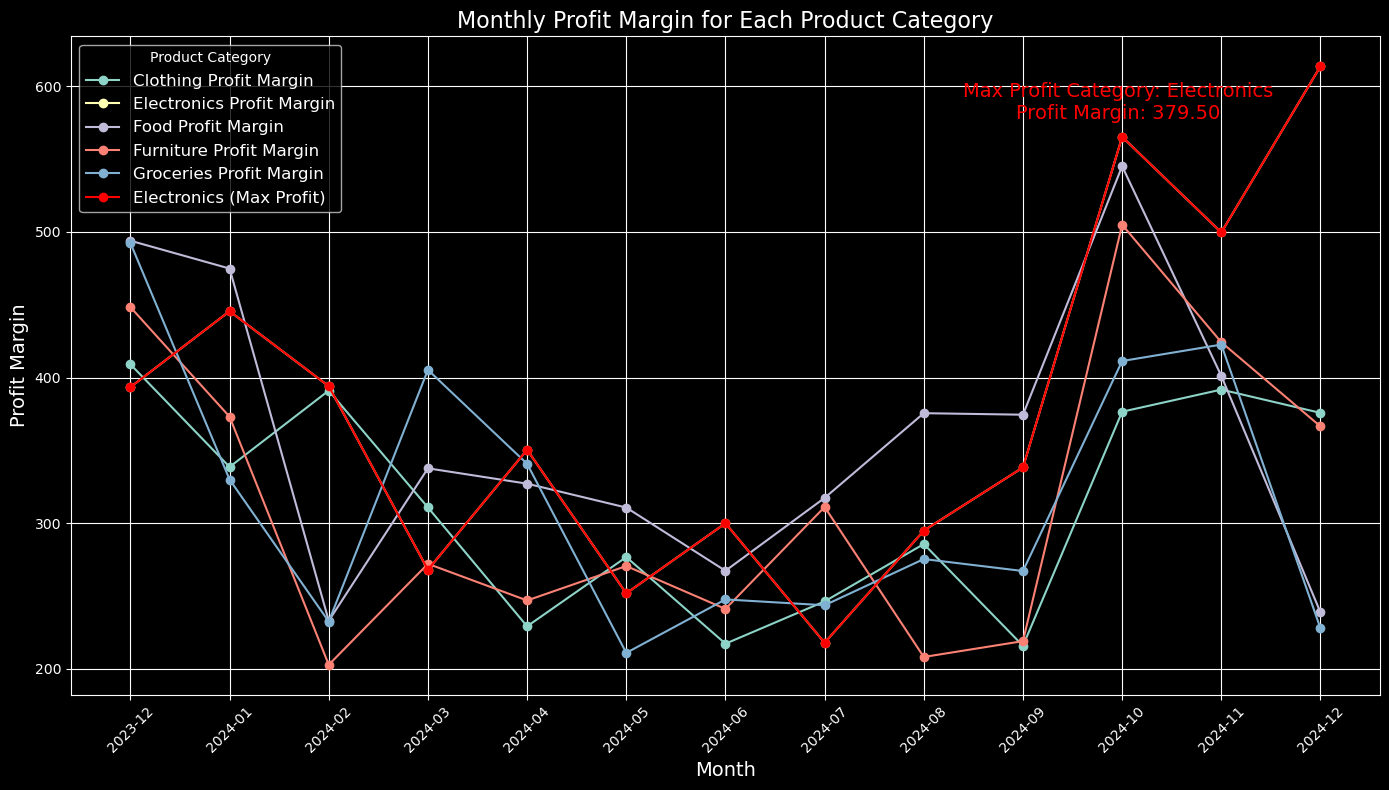

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure Date is in datetime format
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month  # Extract numeric month
data['Year-Month'] = data['Date'].dt.to_period('M')  # Extract year-month as period

# Group by Month and Product Category and calculate average Profit Margin
monthly_profit_margin = data.groupby(['Year-Month', 'Product Category'])['Profit Margin'].mean().reset_index()

# Find the Product Category with the highest average profit margin
avg_profit_margin_by_category = monthly_profit_margin.groupby('Product Category')['Profit Margin'].mean()
max_profit_category = avg_profit_margin_by_category.idxmax()  # Product category with the max profit margin
max_profit_value = avg_profit_margin_by_category.max()  # Max profit margin value

# Plotting the profit margin by Product Category for each Month
plt.figure(figsize=(14, 8))

# Loop through all categories and plot their profit margins
for category in monthly_profit_margin['Product Category'].unique():
    category_data = monthly_profit_margin[monthly_profit_margin['Product Category'] == category]
    plt.plot(category_data['Year-Month'].astype(str), category_data['Profit Margin'], marker='o', label=f'{category} Profit Margin')

# Highlight the category with the max profit margin in red
plt.plot(monthly_profit_margin[monthly_profit_margin['Product Category'] == max_profit_category]['Year-Month'].astype(str),
         monthly_profit_margin[monthly_profit_margin['Product Category'] == max_profit_category]['Profit Margin'], 
         marker='o', color='red', label=f'{max_profit_category} (Max Profit)')

# Customizing the plot
plt.title('Monthly Profit Margin for Each Product Category', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Profit Margin', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Product Category", fontsize=12)
plt.grid(True)
plt.tight_layout()

# Adding a text annotation to highlight the category with the max profit
plt.text(0.8, 0.9, f"Max Profit Category: {max_profit_category}\nProfit Margin: {max_profit_value:.2f}", 
         ha='center', va='center', transform=plt.gca().transAxes, fontsize=14, color='red')

plt.show()


<Figure size 800x800 with 0 Axes>

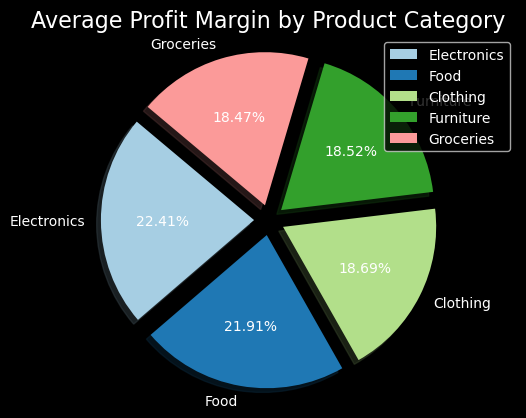

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure Date is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Group by Product Category and calculate the average Profit Margin
avg_profit_margin_by_category = data.groupby('Product Category')['Profit Margin'].mean().reset_index()

# Sort the categories based on profit margin for better visibility
avg_profit_margin_by_category = avg_profit_margin_by_category.sort_values(by='Profit Margin', ascending=False)

# Create an explode list for separating the slices a bit
# You can tweak these values based on how you want to separate the slices
explode_list = [0.1 for _ in range(len(avg_profit_margin_by_category))]  # Slightly explode all slices

# Plotting the pie chart
plt.figure(figsize=(8, 8))
avg_profit_margin_by_category.plot(kind='pie', y='Profit Margin', 
                                   labels=avg_profit_margin_by_category['Product Category'], 
                                   autopct='%1.2f%%', startangle=140, 
                                   explode=explode_list, shadow=True, 
                                   colors=plt.cm.Paired.colors)

# Customizing the plot
plt.title('Average Profit Margin by Product Category', fontsize=16)
plt.ylabel('')  # To remove the default 'Profit Margin' label
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


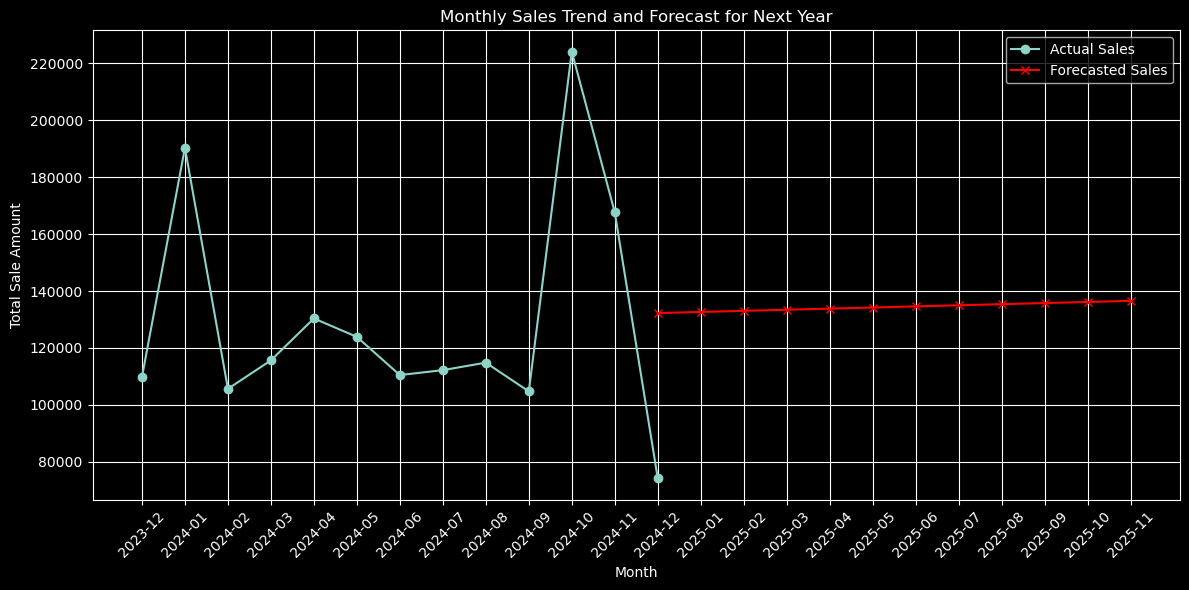

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Example: Convert Month names to numerical values
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5,
                 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10,
                 'November': 11, 'December': 12}

# Ensure Date is in datetime format and map months to numbers
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month  # Extract numeric month
data['Year-Month'] = data['Date'].dt.to_period('M')  # Extract year-month as period

# Aggregate total sales by month (group by Year-Month)
monthly_sales = data.groupby('Year-Month')['Total Sale Amount'].sum().reset_index()

# Add numeric month for regression
monthly_sales['Numeric_Month'] = np.arange(len(monthly_sales))

# Define features (X) and target (y)
X = monthly_sales[['Numeric_Month']]
y = monthly_sales['Total Sale Amount']

# Train Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict future sales for the next 12 months
future_months = np.arange(X['Numeric_Month'].max() + 1, X['Numeric_Month'].max() + 13).reshape(-1, 1)
future_sales = model.predict(future_months)

# Create a DataFrame for future predictions
future_dates = pd.date_range(start=monthly_sales['Year-Month'].max().to_timestamp(), periods=12, freq='M')
predicted_data = pd.DataFrame({'Date': future_dates, 'Predicted Sales': future_sales})

# Plot actual and forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Year-Month'].astype(str), monthly_sales['Total Sale Amount'], marker='o', label='Actual Sales')
plt.plot(predicted_data['Date'].dt.to_period('M').astype(str), predicted_data['Predicted Sales'], marker='x', label='Forecasted Sales', color='red')
plt.title('Monthly Sales Trend and Forecast for Next Year')
plt.xlabel('Month')
plt.ylabel('Total Sale Amount')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


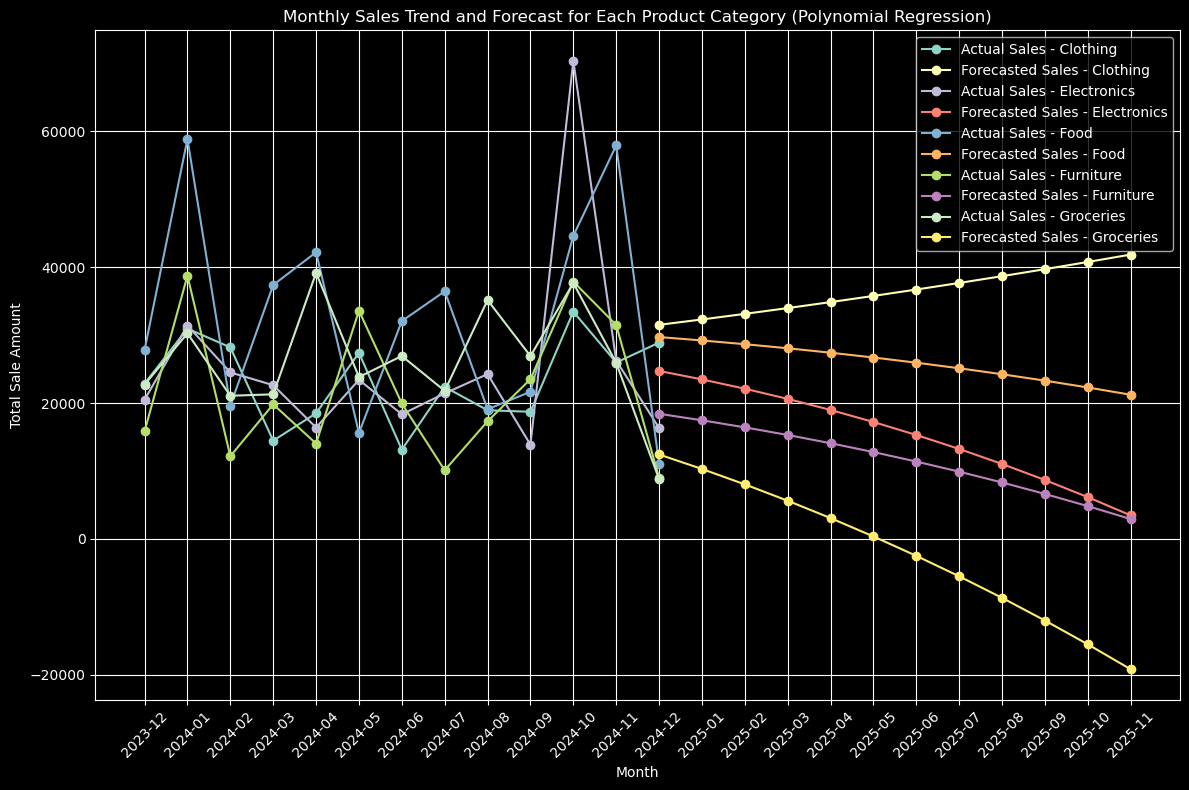

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Ensure Date is in datetime format
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month  # Extract numeric month
data['Year-Month'] = data['Date'].dt.to_period('M')  # Extract year-month as period

# Aggregate total sales by Month and Product Category
monthly_sales_by_category = data.groupby(['Year-Month', 'Product Category'])['Total Sale Amount'].sum().reset_index()

# Create a column for numeric month for regression
monthly_sales_by_category['Numeric_Month'] = np.arange(len(monthly_sales_by_category))

# Polynomial Regression for each Product Category
product_categories = monthly_sales_by_category['Product Category'].unique()

plt.figure(figsize=(12, 8))

for category in product_categories:
    category_data = monthly_sales_by_category[monthly_sales_by_category['Product Category'] == category]
    
    # Define features (X) and target (y)
    X = category_data[['Numeric_Month']]
    y = category_data['Total Sale Amount']
    
    # Polynomial Regression with a degree of 3 (can adjust degree based on trend)
    poly = PolynomialFeatures(degree=3)
    X_poly = poly.fit_transform(X)
    
    # Train the Polynomial Regression model
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # Predict future sales for the next 12 months
    future_months = np.arange(X['Numeric_Month'].max() + 1, X['Numeric_Month'].max() + 13).reshape(-1, 1)
    future_months_poly = poly.transform(future_months)
    future_sales = model.predict(future_months_poly)
    
    # Create a DataFrame for future predictions
    future_dates = pd.date_range(start=category_data['Year-Month'].max().to_timestamp(), periods=12, freq='M')
    predicted_data = pd.DataFrame({'Date': future_dates, 'Predicted Sales': future_sales, 'Product Category': category})
    
    # Plot actual and forecasted sales
    plt.plot(category_data['Year-Month'].astype(str), category_data['Total Sale Amount'], marker='o', label=f'Actual Sales - {category}')
    plt.plot(predicted_data['Date'].dt.to_period('M').astype(str), predicted_data['Predicted Sales'], marker='o', label=f'Forecasted Sales - {category}', linestyle='-')

plt.title('Monthly Sales Trend and Forecast for Each Product Category (Polynomial Regression)')
plt.xlabel('Month')
plt.ylabel('Total Sale Amount')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
